<a href="https://colab.research.google.com/github/5ungmin/Bioinformatics-with-Python-Cookbook-Second-Edition/blob/master/Raghava/stage_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# get the data

In [2]:
training_data = pd.read_csv('Train_30RNA_zscore_normalized.csv') 
testing_data = pd.read_csv('Test_30RNA_zscore_normalized.csv')

In [7]:
training_data.shape

(279, 31)

In [4]:
training_data.dtypes.index

Index(['Label', 'ENSG00000151224.11', 'ENSG00000156136.8', 'ENSG00000218582.2',
       'ENSG00000197744.5', 'ENSG00000238024.1', 'ENSG00000213867.4',
       'ENSG00000230104.1', 'ENSG00000146670.8', 'ENSG00000178718.6',
       'ENSG00000170075.8', 'ENSG00000196968.9', 'ENSG00000217130.1',
       'ENSG00000123119.10', 'ENSG00000213398.6', 'ENSG00000273662.1',
       'ENSG00000243101.1', 'ENSG00000122679.7', 'ENSG00000116785.12',
       'ENSG00000248374.1', 'ENSG00000218574.1', 'ENSG00000184999.10',
       'ENSG00000243977.1', 'ENSG00000233662.1', 'ENSG00000257365.6',
       'ENSG00000124444.14', 'ENSG00000171208.8', 'ENSG00000241735.1',
       'ENSG00000119915.4', 'ENSG00000269921.1', 'ENSG00000234389.1'],
      dtype='object')

In [5]:
training_data

,Label,ENSG00000151224.11,ENSG00000156136.8,ENSG00000218582.2,ENSG00000197744.5,ENSG00000238024.1,ENSG00000213867.4,ENSG00000230104.1,ENSG00000146670.8,ENSG00000178718.6,ENSG00000170075.8,ENSG00000196968.9,ENSG00000217130.1,ENSG00000123119.10,ENSG00000213398.6,ENSG00000273662.1,ENSG00000243101.1,ENSG00000122679.7,ENSG00000116785.12,ENSG00000248374.1,ENSG00000218574.1,ENSG00000184999.10,ENSG00000243977.1,ENSG00000233662.1,ENSG00000257365.6,ENSG00000124444.14,ENSG00000171208.8,ENSG00000241735.1,ENSG00000119915.4,ENSG00000269921.1,ENSG00000234389.1
0,Early_Stage,-0.529573,-0.742447,0.035206,-0.009787,-0.054147,-0.683099,-0.421615,-0.533982,0.479280,1.871719,0.679641,1.030488,-0.305292,-0.135070,-0.500101,0.797506,1.317762,-0.780307,-0.2723,-0.530650,-0.070670,-0.588354,-0.382378,1.338165,-0.680982,-0.453420,0.107529,-0.560607,-0.800208,-0.615524
1,Early_Stage,0.236898,-0.594952,-0.418097,-0.194016,-0.461850,0.224333,-0.421615,-0.521737,-1.081897,-0.444683,-1.391085,-0.520251,-0.579959,-1.489502,-0.500101,0.702703,-1.085770,0.673412,-0.2723,-0.530650,2.154708,-0.588354,-0.382378,-1.649358,-1.052624,-0.743749,0.051085,-0.291187,-0.446197,-0.279255
2,Early_Stage,-0.481538,0.162105,-0.401803,-0.146582,-0.461850,0.839023,-0.421615,0.355909,4.143338,-0.512012,-0.329578,-0.243093,-0.042385,1.684830,-0.500101,0.507075,-1.350404,-0.721536,-0.2723,0.625941,-1.450134,-0.588354,-0.382378,2.402742,0.616856,1.020677,1.273121,2.081587,0.068833,-0.044631
3,Early_Stage,0.955754,-0.469805,-0.127157,-0.296945,-0.461850,-0.683099,-0.421615,-0.942289,-0.980272,-0.087357,0.109925,-0.957519,-0.532876,0.397363,-0.500101,0.443613,0.777197,-1.121151,-0.2723,-0.530650,1.542009,-0.588354,3.366655,-1.454238,-0.617955,-0.638240,-0.753440,-0.560607,-0.591837,0.706927
4,Early_Stage,-0.866561,0.099887,0.725907,1.833288,-0.461850,-0.019914,-0.303899,-0.041467,0.541955,-0.524571,-0.629090,1.057151,-0.491483,0.883810,-0.500101,0.334356,-0.284028,0.293333,-0.2723,1.421263,1.795682,0.288445,-0.382378,-0.355626,1.324916,-0.700277,-0.753440,-0.520134,-0.935310,-0.615524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Late_Stage,0.005842,0.740908,-0.815713,-0.148299,-0.461850,0.255797,-0.421615,0.955287,-0.446668,-0.616144,0.142286,-1.291755,-0.163617,-1.601785,-0.500101,-0.655123,0.583021,0.302509,-0.2723,-0.530650,1.492645,-0.588354,-0.382378,-0.013492,-0.501579,-0.205846,-0.753440,-0.125305,-0.041197,-0.615524
275,Late_Stage,-0.078132,0.401342,-0.675818,0.190896,4.190320,0.248204,1.027649,-0.639433,-0.172867,2.138743,0.035448,-0.743782,0.537284,-0.667125,1.231477,-0.655123,-0.659405,-0.148225,-0.2723,2.212956,-1.256911,-0.588354,-0.382378,0.023627,-0.362991,-0.404992,1.670306,1.423410,-1.225695,0.069038
276,Late_Stage,-0.477610,-1.008956,0.687244,0.634472,2.468081,0.992184,-0.268992,-0.349014,0.718164,-0.654963,0.987260,1.463322,-0.190914,0.654897,-0.500101,-0.655123,1.811829,-0.751481,-0.2723,-0.530650,0.670268,-0.588354,-0.382378,0.482706,1.004116,0.344979,-0.753440,-0.405323,-0.488034,-0.615524
277,Late_Stage,0.300766,-0.112091,-0.344687,-0.643606,0.130392,0.041640,-0.421615,-0.671642,1.927124,0.334206,-0.275752,0.091225,-0.377779,0.887620,-0.500101,-0.655123,0.020409,1.414167,-0.2723,-0.530650,-0.554219,0.370502,-0.382378,0.062497,1.236543,0.526226,-0.753440,-0.516324,-0.303981,-0.615524


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Label               279 non-null    object 
 1   ENSG00000151224.11  279 non-null    float64
 2   ENSG00000156136.8   279 non-null    float64
 3   ENSG00000218582.2   279 non-null    float64
 4   ENSG00000197744.5   279 non-null    float64
 5   ENSG00000238024.1   279 non-null    float64
 6   ENSG00000213867.4   279 non-null    float64
 7   ENSG00000230104.1   279 non-null    float64
 8   ENSG00000146670.8   279 non-null    float64
 9   ENSG00000178718.6   279 non-null    float64
 10  ENSG00000170075.8   279 non-null    float64
 11  ENSG00000196968.9   279 non-null    float64
 12  ENSG00000217130.1   279 non-null    float64
 13  ENSG00000123119.10  279 non-null    float64
 14  ENSG00000213398.6   279 non-null    float64
 15  ENSG00000273662.1   279 non-null    float64
 16  ENSG0000

droping the id col as it is just a unique name !!!  

In [10]:
# 이 사람은 왼쪽에 한 열이 더 있어서 제거한 것이다. 나는 이 과정이 필요 없다.
# training_data = training_data.drop(['id'],axis=1)

Early_Stage가 몇 개인지, Late_Stage가 몇 개인지 보자.

In [12]:
count_early = 0 
count_late = 0

print("Number of training set are : ", len(training_data))

for i in training_data['Label']:
    if i == 'Early_Stage' :
        count_early += 1
    elif i == 'Late_Stage' :
        count_late += 1
        
print("Number of early staged data : ",count_early)        
print("Number of late staged data : ",count_late)        
        

Number of training set are :  279
Number of early staged data :  138
Number of late staged data :  141


labels are -1(late) and 1(Early) . Convert the labels to 0(early) or 1 (late)   
왠지는 모르겠지만 0과 1로 바꾸고 있다.

In [13]:
def change(x):
    
    if x == 'Late_Stage':
        return 1
    elif x == 'Early_Stage':
        return 0
    
        
training_data['Label'] = training_data['Label'].map(change)        

In [15]:
training_data

,Label,ENSG00000151224.11,ENSG00000156136.8,ENSG00000218582.2,ENSG00000197744.5,ENSG00000238024.1,ENSG00000213867.4,ENSG00000230104.1,ENSG00000146670.8,ENSG00000178718.6,ENSG00000170075.8,ENSG00000196968.9,ENSG00000217130.1,ENSG00000123119.10,ENSG00000213398.6,ENSG00000273662.1,ENSG00000243101.1,ENSG00000122679.7,ENSG00000116785.12,ENSG00000248374.1,ENSG00000218574.1,ENSG00000184999.10,ENSG00000243977.1,ENSG00000233662.1,ENSG00000257365.6,ENSG00000124444.14,ENSG00000171208.8,ENSG00000241735.1,ENSG00000119915.4,ENSG00000269921.1,ENSG00000234389.1
0,0,-0.529573,-0.742447,0.035206,-0.009787,-0.054147,-0.683099,-0.421615,-0.533982,0.479280,1.871719,0.679641,1.030488,-0.305292,-0.135070,-0.500101,0.797506,1.317762,-0.780307,-0.2723,-0.530650,-0.070670,-0.588354,-0.382378,1.338165,-0.680982,-0.453420,0.107529,-0.560607,-0.800208,-0.615524
1,0,0.236898,-0.594952,-0.418097,-0.194016,-0.461850,0.224333,-0.421615,-0.521737,-1.081897,-0.444683,-1.391085,-0.520251,-0.579959,-1.489502,-0.500101,0.702703,-1.085770,0.673412,-0.2723,-0.530650,2.154708,-0.588354,-0.382378,-1.649358,-1.052624,-0.743749,0.051085,-0.291187,-0.446197,-0.279255
2,0,-0.481538,0.162105,-0.401803,-0.146582,-0.461850,0.839023,-0.421615,0.355909,4.143338,-0.512012,-0.329578,-0.243093,-0.042385,1.684830,-0.500101,0.507075,-1.350404,-0.721536,-0.2723,0.625941,-1.450134,-0.588354,-0.382378,2.402742,0.616856,1.020677,1.273121,2.081587,0.068833,-0.044631
3,0,0.955754,-0.469805,-0.127157,-0.296945,-0.461850,-0.683099,-0.421615,-0.942289,-0.980272,-0.087357,0.109925,-0.957519,-0.532876,0.397363,-0.500101,0.443613,0.777197,-1.121151,-0.2723,-0.530650,1.542009,-0.588354,3.366655,-1.454238,-0.617955,-0.638240,-0.753440,-0.560607,-0.591837,0.706927
4,0,-0.866561,0.099887,0.725907,1.833288,-0.461850,-0.019914,-0.303899,-0.041467,0.541955,-0.524571,-0.629090,1.057151,-0.491483,0.883810,-0.500101,0.334356,-0.284028,0.293333,-0.2723,1.421263,1.795682,0.288445,-0.382378,-0.355626,1.324916,-0.700277,-0.753440,-0.520134,-0.935310,-0.615524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,0.005842,0.740908,-0.815713,-0.148299,-0.461850,0.255797,-0.421615,0.955287,-0.446668,-0.616144,0.142286,-1.291755,-0.163617,-1.601785,-0.500101,-0.655123,0.583021,0.302509,-0.2723,-0.530650,1.492645,-0.588354,-0.382378,-0.013492,-0.501579,-0.205846,-0.753440,-0.125305,-0.041197,-0.615524
275,1,-0.078132,0.401342,-0.675818,0.190896,4.190320,0.248204,1.027649,-0.639433,-0.172867,2.138743,0.035448,-0.743782,0.537284,-0.667125,1.231477,-0.655123,-0.659405,-0.148225,-0.2723,2.212956,-1.256911,-0.588354,-0.382378,0.023627,-0.362991,-0.404992,1.670306,1.423410,-1.225695,0.069038
276,1,-0.477610,-1.008956,0.687244,0.634472,2.468081,0.992184,-0.268992,-0.349014,0.718164,-0.654963,0.987260,1.463322,-0.190914,0.654897,-0.500101,-0.655123,1.811829,-0.751481,-0.2723,-0.530650,0.670268,-0.588354,-0.382378,0.482706,1.004116,0.344979,-0.753440,-0.405323,-0.488034,-0.615524
277,1,0.300766,-0.112091,-0.344687,-0.643606,0.130392,0.041640,-0.421615,-0.671642,1.927124,0.334206,-0.275752,0.091225,-0.377779,0.887620,-0.500101,-0.655123,0.020409,1.414167,-0.2723,-0.530650,-0.554219,0.370502,-0.382378,0.062497,1.236543,0.526226,-0.753440,-0.516324,-0.303981,-0.615524


0과 1로 잘 바뀌었다.

In [16]:
print(training_data['Label'].value_counts())
count_early, count_late = training_data['Label'].value_counts()

1    141
0    138
Name: Label, dtype: int64


In [17]:
data_late = training_data[training_data['Label'] == 1]
data_early = training_data[training_data['Label'] == 0]

In [18]:
len(data_early)

138

In [19]:
len(data_late)

141

concatinating both of them!!1   
0 다음에 1이 오도록 만들어주고 있다.   
나는 안 해도 된다.

In [ ]:
# train_data = pd.concat([data_early,data_late],axis=0)

# train_data.head()

X_train은 1열을 뺀 나머지   
Y_train은 'Label'열

In [20]:
# X : data
# Y : label

X_train = training_data.drop('Label',axis = 1)
Y_train = training_data['Label']

In [27]:
X_train

,ENSG00000151224.11,ENSG00000156136.8,ENSG00000218582.2,ENSG00000197744.5,ENSG00000238024.1,ENSG00000213867.4,ENSG00000230104.1,ENSG00000146670.8,ENSG00000178718.6,ENSG00000170075.8,ENSG00000196968.9,ENSG00000217130.1,ENSG00000123119.10,ENSG00000213398.6,ENSG00000273662.1,ENSG00000243101.1,ENSG00000122679.7,ENSG00000116785.12,ENSG00000248374.1,ENSG00000218574.1,ENSG00000184999.10,ENSG00000243977.1,ENSG00000233662.1,ENSG00000257365.6,ENSG00000124444.14,ENSG00000171208.8,ENSG00000241735.1,ENSG00000119915.4,ENSG00000269921.1,ENSG00000234389.1
0,-0.529573,-0.742447,0.035206,-0.009787,-0.054147,-0.683099,-0.421615,-0.533982,0.479280,1.871719,0.679641,1.030488,-0.305292,-0.135070,-0.500101,0.797506,1.317762,-0.780307,-0.2723,-0.530650,-0.070670,-0.588354,-0.382378,1.338165,-0.680982,-0.453420,0.107529,-0.560607,-0.800208,-0.615524
1,0.236898,-0.594952,-0.418097,-0.194016,-0.461850,0.224333,-0.421615,-0.521737,-1.081897,-0.444683,-1.391085,-0.520251,-0.579959,-1.489502,-0.500101,0.702703,-1.085770,0.673412,-0.2723,-0.530650,2.154708,-0.588354,-0.382378,-1.649358,-1.052624,-0.743749,0.051085,-0.291187,-0.446197,-0.279255
2,-0.481538,0.162105,-0.401803,-0.146582,-0.461850,0.839023,-0.421615,0.355909,4.143338,-0.512012,-0.329578,-0.243093,-0.042385,1.684830,-0.500101,0.507075,-1.350404,-0.721536,-0.2723,0.625941,-1.450134,-0.588354,-0.382378,2.402742,0.616856,1.020677,1.273121,2.081587,0.068833,-0.044631
3,0.955754,-0.469805,-0.127157,-0.296945,-0.461850,-0.683099,-0.421615,-0.942289,-0.980272,-0.087357,0.109925,-0.957519,-0.532876,0.397363,-0.500101,0.443613,0.777197,-1.121151,-0.2723,-0.530650,1.542009,-0.588354,3.366655,-1.454238,-0.617955,-0.638240,-0.753440,-0.560607,-0.591837,0.706927
4,-0.866561,0.099887,0.725907,1.833288,-0.461850,-0.019914,-0.303899,-0.041467,0.541955,-0.524571,-0.629090,1.057151,-0.491483,0.883810,-0.500101,0.334356,-0.284028,0.293333,-0.2723,1.421263,1.795682,0.288445,-0.382378,-0.355626,1.324916,-0.700277,-0.753440,-0.520134,-0.935310,-0.615524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.005842,0.740908,-0.815713,-0.148299,-0.461850,0.255797,-0.421615,0.955287,-0.446668,-0.616144,0.142286,-1.291755,-0.163617,-1.601785,-0.500101,-0.655123,0.583021,0.302509,-0.2723,-0.530650,1.492645,-0.588354,-0.382378,-0.013492,-0.501579,-0.205846,-0.753440,-0.125305,-0.041197,-0.615524
275,-0.078132,0.401342,-0.675818,0.190896,4.190320,0.248204,1.027649,-0.639433,-0.172867,2.138743,0.035448,-0.743782,0.537284,-0.667125,1.231477,-0.655123,-0.659405,-0.148225,-0.2723,2.212956,-1.256911,-0.588354,-0.382378,0.023627,-0.362991,-0.404992,1.670306,1.423410,-1.225695,0.069038
276,-0.477610,-1.008956,0.687244,0.634472,2.468081,0.992184,-0.268992,-0.349014,0.718164,-0.654963,0.987260,1.463322,-0.190914,0.654897,-0.500101,-0.655123,1.811829,-0.751481,-0.2723,-0.530650,0.670268,-0.588354,-0.382378,0.482706,1.004116,0.344979,-0.753440,-0.405323,-0.488034,-0.615524
277,0.300766,-0.112091,-0.344687,-0.643606,0.130392,0.041640,-0.421615,-0.671642,1.927124,0.334206,-0.275752,0.091225,-0.377779,0.887620,-0.500101,-0.655123,0.020409,1.414167,-0.2723,-0.530650,-0.554219,0.370502,-0.382378,0.062497,1.236543,0.526226,-0.753440,-0.516324,-0.303981,-0.615524


In [28]:
Y_train

0      0
1      0
2      0
3      0
4      0
      ..
274    1
275    1
276    1
277    1
278    1
Name: Label, Length: 279, dtype: int64


Graph showning the count of Training datasets


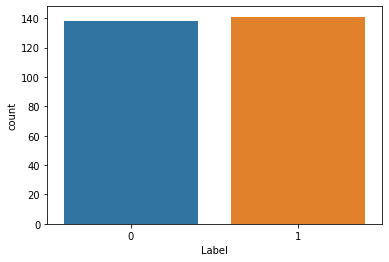

In [24]:
print("\nGraph showning the count of Training datasets")
sns.countplot(data=training_data, x = 'Label', label ='Count')

몇 개인지 왜 이렇게 자주 세는 거야...

test data도 0과 1로 바꾸고 X_train과 Y_train으로 나눈다.

In [32]:
testing_data['Label'] = testing_data['Label'].map(change)

In [33]:
testing_data

,Label,ENSG00000151224.11,ENSG00000156136.8,ENSG00000218582.2,ENSG00000197744.5,ENSG00000238024.1,ENSG00000213867.4,ENSG00000230104.1,ENSG00000146670.8,ENSG00000178718.6,ENSG00000170075.8,ENSG00000196968.9,ENSG00000217130.1,ENSG00000123119.10,ENSG00000213398.6,ENSG00000273662.1,ENSG00000243101.1,ENSG00000122679.7,ENSG00000116785.12,ENSG00000248374.1,ENSG00000218574.1,ENSG00000184999.10,ENSG00000243977.1,ENSG00000233662.1,ENSG00000257365.6,ENSG00000124444.14,ENSG00000171208.8,ENSG00000241735.1,ENSG00000119915.4,ENSG00000269921.1,ENSG00000234389.1
0,0,-0.400626,0.307710,0.255054,0.860409,-0.461850,0.258873,-0.253905,-0.160156,0.373748,0.148029,-0.280124,-0.055409,-0.328995,0.610540,-0.500101,2.120791,0.969450,1.168905,-0.2723,-0.530650,-0.208373,-0.588354,-0.382378,0.512679,-0.696049,0.358733,-0.753440,-0.335145,-1.225695,-0.266219
1,0,-0.656157,-0.144754,-0.999026,-0.337039,-0.461850,0.029577,-0.295046,0.680784,0.149921,0.043485,0.184028,-0.866684,-0.525014,0.263237,-0.500101,1.447375,0.806554,-0.695961,-0.2723,-0.530650,0.037694,-0.588354,-0.382378,1.202007,-0.864120,-0.120310,-0.753440,-0.560607,0.240151,-0.352435
2,0,0.289481,-1.813881,1.537203,3.881889,0.176044,-0.683099,1.137742,-0.894674,0.009934,-0.410506,-0.714141,0.883517,-0.588092,1.750603,-0.500101,-0.655123,0.250041,0.811550,-0.2723,1.775895,-1.153794,0.448736,-0.382378,-0.585541,0.649648,-0.826991,-0.753440,-0.512687,-0.231656,-0.325945
3,0,0.569113,-0.373283,-0.975823,-0.872522,-0.461850,-0.683099,-0.421615,0.008582,-0.358559,2.318920,-1.037908,5.874421,-0.501967,-0.054594,-0.500101,-0.655123,0.213288,0.093369,-0.2723,-0.530650,0.226689,-0.588354,-0.382378,0.134789,-1.386284,-0.462018,0.005076,-0.024409,-0.850358,-0.615524
4,0,1.021206,-1.346721,-0.189764,-1.218919,-0.461850,-0.683099,-0.265435,-1.586778,-0.488893,-0.178436,-0.597058,-1.154003,-0.581904,1.496137,1.144339,1.932538,1.525433,1.416251,-0.2723,-0.530650,1.309329,0.575067,-0.382378,-0.934959,-1.716109,-0.571931,0.024445,-0.250067,-0.471258,0.344020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,0.149815,-2.552016,-0.433974,-1.982335,-0.461850,0.203026,-0.421615,1.081632,0.060445,-0.594380,-0.233131,-0.118241,-0.539048,-1.338055,-0.500101,-0.655123,-1.052246,-0.163029,-0.2723,-0.530650,-0.486922,-0.588354,-0.382378,0.160341,0.608633,-0.012579,-0.753440,-0.452837,-0.105569,-0.615524
67,1,0.695843,-0.470314,0.050971,-0.148715,-0.092405,-0.683099,-0.421615,0.337776,-0.860713,-0.482543,-1.150313,-0.895432,0.344110,2.184519,-0.500101,-0.655123,0.761581,0.141380,-0.2723,0.776312,-0.037381,-0.588354,1.900180,-0.118009,1.709744,-0.580290,0.024251,0.123496,0.556775,-0.615524
68,1,-0.258996,1.029954,1.912210,1.308469,0.023025,1.025169,-0.317247,0.609382,0.999756,-0.643689,-0.299963,1.045066,-0.619577,0.671607,-0.500101,-0.655123,-0.986485,-0.591510,-0.2723,2.047534,-0.106958,1.697033,1.148131,-0.268153,1.063959,-0.467640,-0.753440,1.420780,-0.235490,-0.398819
69,1,-3.002163,1.876821,0.088945,2.248428,-0.461850,-0.196324,0.074415,2.091729,0.215130,0.376683,1.048182,4.961898,0.286939,-1.357863,0.466549,0.782499,0.693831,-1.300914,1.3180,2.298248,-1.374190,-0.588354,0.883639,1.160078,0.267702,0.007636,0.098592,0.134847,1.223302,0.263043


In [34]:
X_test = testing_data.drop('Label',axis = 1)
Y_test = testing_data['Label']

In [35]:
X_test

,ENSG00000151224.11,ENSG00000156136.8,ENSG00000218582.2,ENSG00000197744.5,ENSG00000238024.1,ENSG00000213867.4,ENSG00000230104.1,ENSG00000146670.8,ENSG00000178718.6,ENSG00000170075.8,ENSG00000196968.9,ENSG00000217130.1,ENSG00000123119.10,ENSG00000213398.6,ENSG00000273662.1,ENSG00000243101.1,ENSG00000122679.7,ENSG00000116785.12,ENSG00000248374.1,ENSG00000218574.1,ENSG00000184999.10,ENSG00000243977.1,ENSG00000233662.1,ENSG00000257365.6,ENSG00000124444.14,ENSG00000171208.8,ENSG00000241735.1,ENSG00000119915.4,ENSG00000269921.1,ENSG00000234389.1
0,-0.400626,0.307710,0.255054,0.860409,-0.461850,0.258873,-0.253905,-0.160156,0.373748,0.148029,-0.280124,-0.055409,-0.328995,0.610540,-0.500101,2.120791,0.969450,1.168905,-0.2723,-0.530650,-0.208373,-0.588354,-0.382378,0.512679,-0.696049,0.358733,-0.753440,-0.335145,-1.225695,-0.266219
1,-0.656157,-0.144754,-0.999026,-0.337039,-0.461850,0.029577,-0.295046,0.680784,0.149921,0.043485,0.184028,-0.866684,-0.525014,0.263237,-0.500101,1.447375,0.806554,-0.695961,-0.2723,-0.530650,0.037694,-0.588354,-0.382378,1.202007,-0.864120,-0.120310,-0.753440,-0.560607,0.240151,-0.352435
2,0.289481,-1.813881,1.537203,3.881889,0.176044,-0.683099,1.137742,-0.894674,0.009934,-0.410506,-0.714141,0.883517,-0.588092,1.750603,-0.500101,-0.655123,0.250041,0.811550,-0.2723,1.775895,-1.153794,0.448736,-0.382378,-0.585541,0.649648,-0.826991,-0.753440,-0.512687,-0.231656,-0.325945
3,0.569113,-0.373283,-0.975823,-0.872522,-0.461850,-0.683099,-0.421615,0.008582,-0.358559,2.318920,-1.037908,5.874421,-0.501967,-0.054594,-0.500101,-0.655123,0.213288,0.093369,-0.2723,-0.530650,0.226689,-0.588354,-0.382378,0.134789,-1.386284,-0.462018,0.005076,-0.024409,-0.850358,-0.615524
4,1.021206,-1.346721,-0.189764,-1.218919,-0.461850,-0.683099,-0.265435,-1.586778,-0.488893,-0.178436,-0.597058,-1.154003,-0.581904,1.496137,1.144339,1.932538,1.525433,1.416251,-0.2723,-0.530650,1.309329,0.575067,-0.382378,-0.934959,-1.716109,-0.571931,0.024445,-0.250067,-0.471258,0.344020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.149815,-2.552016,-0.433974,-1.982335,-0.461850,0.203026,-0.421615,1.081632,0.060445,-0.594380,-0.233131,-0.118241,-0.539048,-1.338055,-0.500101,-0.655123,-1.052246,-0.163029,-0.2723,-0.530650,-0.486922,-0.588354,-0.382378,0.160341,0.608633,-0.012579,-0.753440,-0.452837,-0.105569,-0.615524
67,0.695843,-0.470314,0.050971,-0.148715,-0.092405,-0.683099,-0.421615,0.337776,-0.860713,-0.482543,-1.150313,-0.895432,0.344110,2.184519,-0.500101,-0.655123,0.761581,0.141380,-0.2723,0.776312,-0.037381,-0.588354,1.900180,-0.118009,1.709744,-0.580290,0.024251,0.123496,0.556775,-0.615524
68,-0.258996,1.029954,1.912210,1.308469,0.023025,1.025169,-0.317247,0.609382,0.999756,-0.643689,-0.299963,1.045066,-0.619577,0.671607,-0.500101,-0.655123,-0.986485,-0.591510,-0.2723,2.047534,-0.106958,1.697033,1.148131,-0.268153,1.063959,-0.467640,-0.753440,1.420780,-0.235490,-0.398819
69,-3.002163,1.876821,0.088945,2.248428,-0.461850,-0.196324,0.074415,2.091729,0.215130,0.376683,1.048182,4.961898,0.286939,-1.357863,0.466549,0.782499,0.693831,-1.300914,1.3180,2.298248,-1.374190,-0.588354,0.883639,1.160078,0.267702,0.007636,0.098592,0.134847,1.223302,0.263043


In [36]:
Y_test

0     0
1     0
2     0
3     0
4     0
     ..
66    1
67    1
68    1
69    1
70    1
Name: Label, Length: 71, dtype: int64

In [37]:
print(testing_data['Label'].value_counts())

1    36
0    35
Name: Label, dtype: int64


# Scaling Vectors

In [38]:
# 논문에서 주는 데이터는 이미 min-max normalization이 되어있다. 고로 안 해도 된다.
# scaling of the data using min-max scaler
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Feature Reduction!!! 

In [ ]:
# 얘도 안 해도 된다. 생략

# Applying Various Models

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

from sklearn import datasets, metrics, model_selection, svm

## KNN Implementation

In [42]:
classifier = KNeighborsClassifier()

In [43]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [44]:
y_pred = classifier.predict(X_train)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(Y_train,y_pred)

0.8207885304659498

Applying model on test data that is given

In [48]:
final_knn = classifier.predict(X_test)

In [49]:
final_knn

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1])

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [56]:
log_roc_auc_knn = roc_auc_score(Y_train,classifier.predict(X_train))
log_roc_auc_knn_1 = roc_auc_score(Y_train,classifier.predict_proba(X_train)[:,1])
print("ROC-AUC score for KNN Model is :",log_roc_auc_knn_1)

ROC-AUC score for KNN Model is : 0.9015572001233426


<function matplotlib.pyplot.show>

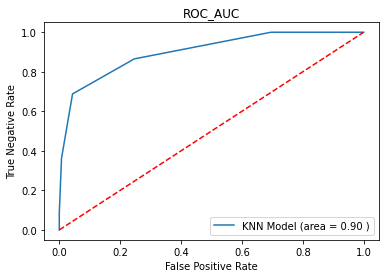

In [57]:
fpr, tpr, threshold = roc_curve(Y_train,classifier.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="KNN Model (area = %0.2f )" % log_roc_auc_knn_1)
plt.title('ROC_AUC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show

## Random Forest Implementation

In [59]:
clf_rfi = RandomForestClassifier()

In [60]:
clf_rfi.fit(X_train,Y_train)

RandomForestClassifier()

In [61]:
clf_rfi.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
accuracy_score(Y_train,clf_rfi.predict(X_train))

1.0

In [64]:
final_rfi = clf_rfi.predict(X_test)
final_rfi

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1])

In [65]:
log_roc_auc_rfi = roc_auc_score(Y_train,clf_rfi.predict(X_train))
log_roc_auc_rfi_1 = roc_auc_score(Y_train,clf_rfi.predict_proba(X_train)[:,1])
print("ROC-AUC score for Random Forest Implementation is :",log_roc_auc_rfi_1)

ROC-AUC score for Random Forest Implementation is : 1.0


<function matplotlib.pyplot.show>

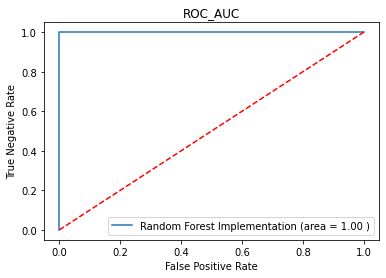

In [69]:
fpr, tpr, threshold = roc_curve(Y_train,clf_rfi.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Random Forest Implementation (area = %0.2f )" % log_roc_auc_rfi_1)
plt.title('ROC_AUC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show

## SVM

In [72]:
SVModel = SVC(kernel='linear',C=1,gamma='auto',probability=True)
SVModel.fit(X_train,Y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

In [75]:
SVModel.predict(X_train)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [76]:
accuracy_score(Y_train,SVModel.predict(X_train))

0.8207885304659498

In [77]:
#Final Prediction Done!!!

final = SVModel.predict(X_test)

In [78]:
final  #Done

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1])

In [79]:
log_roc_auc_svm = roc_auc_score(Y_train,SVModel.predict(X_train))
log_roc_auc_svm_1 = roc_auc_score(Y_train,SVModel.predict_proba(X_train)[:,1])
print("ROC-AUC score for SVM Linear Model is :",log_roc_auc_svm_1)

ROC-AUC score for SVM Linear Model is : 0.880383389865351


<function matplotlib.pyplot.show>

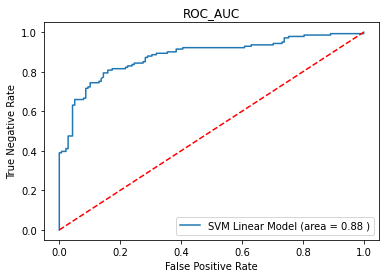

In [81]:
fpr, tpr, threshold = roc_curve(Y_train,SVModel.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="SVM Linear Model (area = %0.2f )" % log_roc_auc_svm_1)
plt.title('ROC_AUC')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show